## Table of contents
1. [Introduction](#intro)  
    1.1 [Data explanation](#data)  
2. [Data cleaning](#clean)  
    2.1 [Duplicates](#dupli)  
    2.2 [Missing values](#missing)  
    2.3 [Split train test data](#split)
3. [Exploration & preparation](#explore)  
    3.1 [Imputation](#imp)  
    3.2 [Feature engineering](#eng) 
5. [Model](#model)  
    5.1 [Performance](#performance)  
6. [Recommendations](#recommend)

In [30]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='intro'></a>
## 1. Introduction

**Source**
https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.

**Goal**
Build a machine learning model to predict whether or not the patients in the dataset have diabetes or not.

<a id='data'></a>
### 1.1 Data explanation

In [6]:
# load data
df = pd.read_csv('datasets_228_482_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

There seem to be 768 women included in this dataset  
The predictor variables included are: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'  
The outcome variable is: Outcome: wether someone has diabetes yes(1) or no(0)

**Predictor variables explanation**   
    0. Number of times pregnant.  
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  
    2. Diastolic blood pressure (mm Hg).  
    3. Triceps skinfold thickness (mm).  
    4. 2-Hour serum insulin (mu U/ml).  
    5. Body mass index (weight in kg/(height in m)^2).  
    6. Diabetes pedigree function: a function which scores likelihood of diabetes based on family history.  
    7. Age (years).  

<a id='clean'></a>
## 2. Data cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a id='dupli'></a>
### 2.1 Check and remove duplicates

In [22]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No duplicated data

<a id='missing'></a>
### 2.2 Check and handle missing values

In [20]:
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No missing values

<a id='split'></a>
### 2.3 Split train test data

In [24]:
df['Outcome'].sum()/df.shape[0]*100

34.89583333333333

Not fully balanced dataset, with 35% of the patients having diabetes

**Before having any look at the data!!!**  
Split data into train and hold out test set, stratified on outcome
Train - CV - Test set split: 60 - 20 - 20  
  
Note: Make sure all the transformations are also performed on the test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# split X and y
X = df.iloc[:,:-1]
y = df['Outcome']

In [33]:
X_trainCV, X_test, y_trainCV, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

<a id='explore'></a>
## 3. Exploration & preparation

* histograms
* correlation plot
* outliers
* groupby
* normality

In [45]:
# combine X_trainCV and y_trainCV for exploration purposes
df_train = pd.merge(X_trainCV, y_trainCV, left_index=True, right_index=True)

In [55]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.833876,121.247557,68.758958,19.863192,75.644951,31.753583,0.448393,33.198697,0.348534
std,3.275560,31.934792,20.108934,15.811930,114.733641,7.854933,0.303550,11.802187,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.025000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,0.000000,32.000000,0.355500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,120.000000,36.500000,0.587000,40.750000,1.000000
max,14.000000,198.000000,122.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


Wow, someone had 14 pregnancies!  
Also, a diastolic BP of 122 seems quite high.  
Let's explore ourliers a bit more as well as differences between outcome groups.  

All the variables are numerical variables, so correlation plots might give some insights into variables that discriminate between outcomes.  
What I'm looking for are variables where the 2 outcome groups overlap the least.  

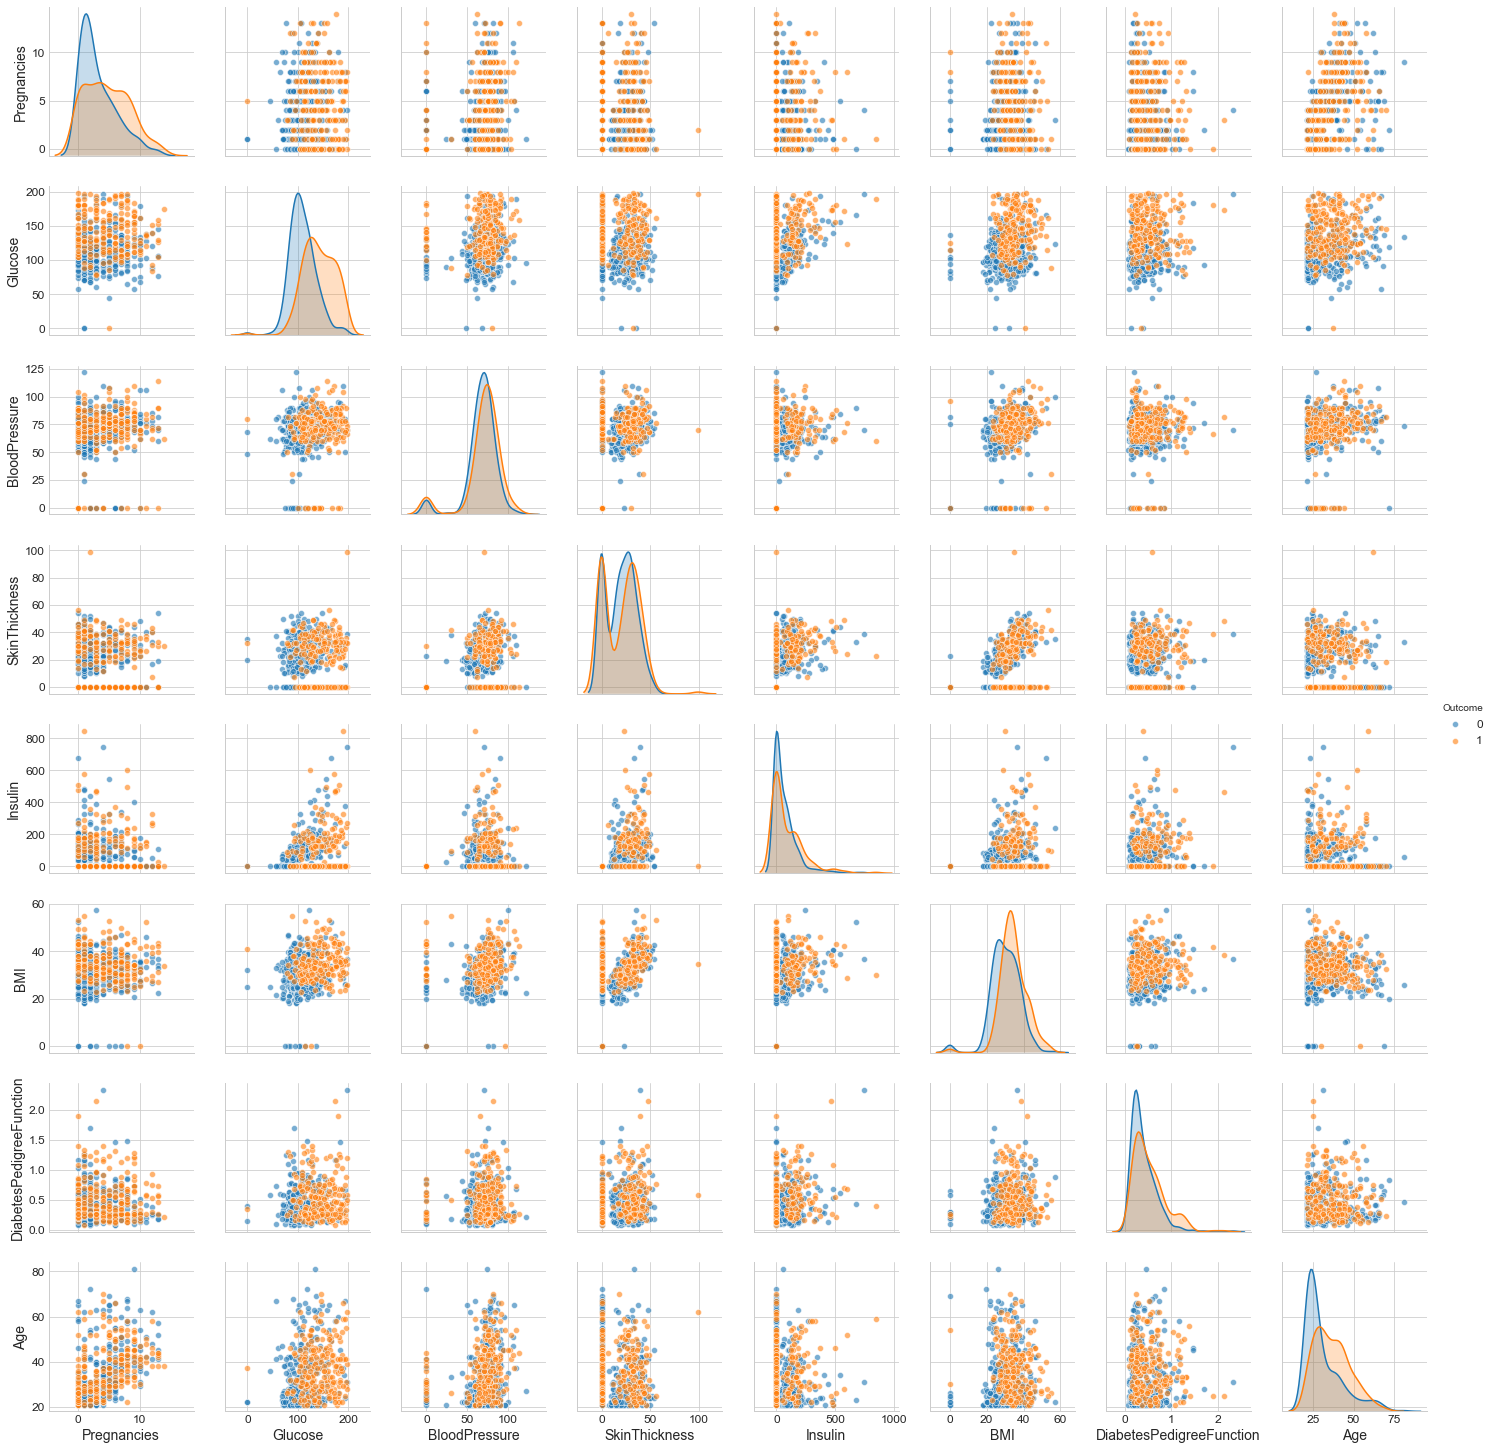

In [52]:
sns.pairplot(df_train, hue='Outcome', plot_kws = {'alpha': 0.6})

A few things become clear after looking at this graph:
- Glucose in itself seems to be a factor that has most discriminative power.  
- The blobs in glucose vs BMI seem to overlap the least, so it might be useful to use a combination of these parameters as a predictor in a model.  
- There do seem to be some zeros that indicate missing values (ie. where 0 seems an incorrect value) e.g. glucose, bloodpressure, skin thickness, insulin, and BMI. I'm going to impute these with the median for each outcome group (since not all distributions are normal, the median makes more sense than the mean).  

<a id='imp'></a>
### 3.1 Imputation

In [57]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# mark zero values as missing or NaN
# variables with incorrect zeros: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'
incorrect_zeros_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df_train[incorrect_zeros_cols] = df_train[incorrect_zeros_cols].replace(0, np.nan)

In [63]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,611.000000,582.000000,426.000000,302.000000,604.000000,614.000000,614.000000,614.000000
mean,3.833876,121.842881,72.539519,28.629108,153.794702,32.279305,0.448393,33.198697,0.348534
std,3.275560,30.857603,12.325937,10.443281,121.448501,6.762036,0.303550,11.802187,0.476895
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,75.000000,27.375000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.500000,122.000000,32.150000,0.355500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,184.500000,36.525000,0.587000,40.750000,1.000000
max,14.000000,198.000000,122.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


In [74]:
from sklearn.impute import SimpleImputer

# retrieve the numpy array
values = df_train[incorrect_zeros_cols].values
print('Before n zeros:', np.isnan(values).sum())
# define the imputer
imputer = SimpleImputer(strategy="median")
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('After n zeros:', np.isnan(transformed_values).sum())

Before n zeros: 545
After n zeros: 0


In [ ]:
# put back into df

<a id='eng'></a>
### 3.2 Feature engineering

<a id='model'></a>
## 5. Model

Let's try out a bunch of classifiers, all with default parameters.

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
compareABunchOfDifferentModelsAccuracy(X_train2, y_train, X_test2, y_test)
defineModels()
# iterate over classifiers; adapted from https://www.kaggle.com/hugues/basic-ml-best-of-10-classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train2, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

<a id='performance'></a>
### 5.1 Performance

Explain why I use which performance measure  